In [4]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as seabornInstance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist
from scipy.spatial import distance
import networkx as nx
import numpy as np
%matplotlib inline

In [5]:
df=pd.read_csv('nba2013.csv')

In [6]:
df.drop(['player','pos', 'bref_team_id','season'], axis=1,inplace=True)

In [7]:
df.head(5)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,142,190,332,43,40,57,71,203,265,2013
2,27,53,12,961,143,275,0.520,0,0,NaN,...,102,204,306,38,24,36,39,108,362,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013


In [8]:
#checking for empty columns
columns_with_missing_values = df.columns[df.isnull().any()]
df[columns_with_missing_values].isnull().sum()

fg.      2
x3p.    67
x2p.     3
efg.     2
ft.     20
dtype: int64

In [9]:
missing_columns = ["x2p.", "x3p.", "fg.", "efg.", "ft."]

In [10]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    return df
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [11]:
#Original mean without imputation
print(np.mean(df['x2p.']))
print(np.mean(df['x3p.']))
print(np.mean(df['fg.']))
print(np.mean(df['efg.']))
print(np.mean(df['ft.']))

0.46694717560626514
0.2851111897859946
0.43643632567849694
0.48075156576200395
0.7224186550976138


In [12]:
df['x2p.']=df['x2p.'].fillna(np.mean(df['x2p.']))
df['x3p.']=df['x3p.'].fillna(np.mean(df['x3p.']))
df['fg.']=df['fg.'].fillna(np.mean(df['fg.']))
df['efg.']=df['efg.'].fillna(np.mean(df['efg.']))
df['ft.']=df['ft.'].fillna(np.mean(df['ft.']))

In [13]:
#after imputing by mean
print(np.mean(df['x2p.']))
print(np.mean(df['x3p.']))
print(np.mean(df['fg.']))
print(np.mean(df['efg.']))
print(np.mean(df['ft.']))

0.4669471756062651
0.28511118978599453
0.43643632567849694
0.480751565762004
0.7224186550976136


In [14]:
#after imputing by random sampling
print(np.mean(df['x2p._imp']))
print(np.mean(df['x3p._imp']))
print(np.mean(df['fg._imp']))
print(np.mean(df['efg._imp']))
print(np.mean(df['ft._imp']))

0.4668551930666181
0.2835803713218673
0.4365218295218296
0.4808523908523906
0.7256860706860706


In [15]:
#Original mean without imputation
print(np.mean(df['x2p._imp']))
print(np.mean(df['x3p._imp']))
print(np.mean(df['fg._imp']))
print(np.mean(df['efg._imp']))
print(np.mean(df['ft._imp']))

0.4668551930666181
0.2835803713218673
0.4365218295218296
0.4808523908523906
0.7256860706860706


In [16]:
#deterministic regression imputation
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns[1:34]) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [17]:
#mean imputation imputation
df['x2p.']=df['x2p.'].fillna(np.mean(df['x2p.']))
df['x3p.']=df['x3p.'].fillna(np.mean(df['x3p.']))
df['fg.']=df['fg.'].fillna(np.mean(df['fg.']))
df['efg.']=df['efg.'].fillna(np.mean(df['efg.']))
df['ft.']=df['ft.'].fillna(np.mean(df['ft.']))

In [18]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data["Ran" + feature] = df[feature + '_imp']
    parameters = list(set(df.columns[1:34]) - set(missing_columns) - {feature + '_imp'})
    
    model = LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = df[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & 
                                                                            (random_predict > 0)]

In [19]:
df['x2p.'] = random_data["Ranx2p."]
df['x3p.'] = random_data["Ranx3p."]
df['fg.'] = random_data["Ranfg."]
df['efg.'] = random_data["Ranefg."]
df['ft.'] = random_data["Ranft."]

In [89]:
df

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
1,20,81,20,1197,93,185,0.503,0,0,0.328889,...,142,190,332,43,40,57,71,203,265,2013
2,27,53,12,961,143,275,0.520,0,0,0.250000,...,102,204,306,38,24,36,39,108,362,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,1765,345,808,0.427,40,188,0.212766,...,69,159,228,217,78,16,204,151,939,2013
477,28,64,9,1810,387,889,0.435,135,350,0.385714,...,29,137,166,95,46,12,95,156,1144,2013
478,25,79,78,2718,582,1283,0.454,90,292,0.308219,...,166,310,476,182,167,36,165,213,1417,2013
479,21,82,3,1416,172,404,0.426,0,1,0.000000,...,118,235,353,92,40,41,87,170,490,2013


In [21]:
df.drop(['x2p._imp', 'x3p._imp','fg._imp','efg._imp','ft._imp'], axis=1,inplace=True)

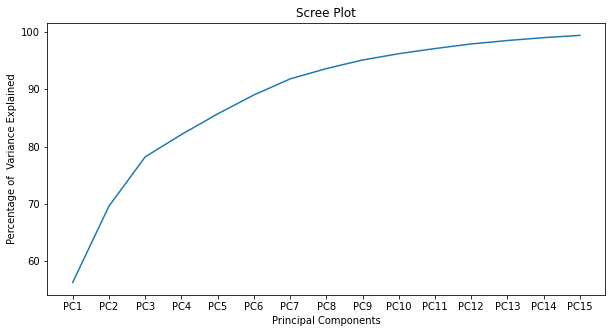

99.39999999999999


In [22]:
scaler = MinMaxScaler() 
df_scaled = scaler.fit_transform(df)
X_std = StandardScaler().fit_transform(df_scaled)
pca=PCA(15)
pca.fit(X_std)
pca_data=pca.transform(X_std)
per_var=np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(10,5))
#plt.bar(x=range(1,len(per_var)+1), height=per_var,tick_label=labels)
plt.plot(labels,np.cumsum(per_var))
plt.ylabel('Percentage of  Variance Explained')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()
print((np.sum(per_var[:])))

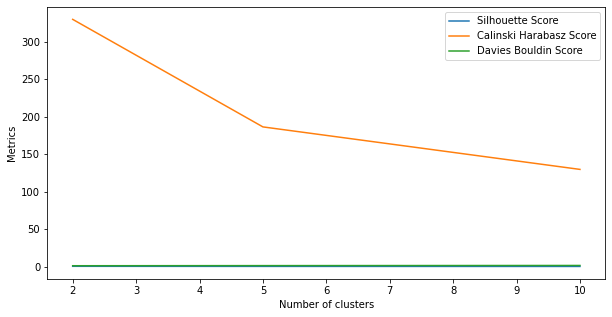

In [68]:
SS = []
CHS=[]
DBS=[]
K=[2,5,10]
for i in K:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pca_data)
    labels = kmeans.labels_
    SS.append(silhouette_score(pca_data, labels))
    CHS.append(calinski_harabasz_score(pca_data, labels))
    DBS.append(davies_bouldin_score(pca_data, labels))
plt.figure(figsize=(10,5))    
plt.plot(K, SS ,label = "Silhouette Score")
plt.plot(K, CHS ,label = "Calinski Harabasz Score")
plt.plot(K, DBS ,label = "Davies Bouldin Score")
plt.xlabel('Number of clusters')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [69]:
print("Silhouette Scores: ",SS)
print("Calinski Harabasz Score: ",CHS)
print("Davies Bouldin Scores: ",DBS)

Silhouette Scores:  [0.3571590444347005, 0.24171242462123385, 0.16624105791566526]
Calinski Harabasz Score:  [330.02407945302036, 186.45182636206167, 129.72236266486019]
Davies Bouldin Scores:  [1.1150390255097262, 1.273630827226927, 1.4756157329676298]


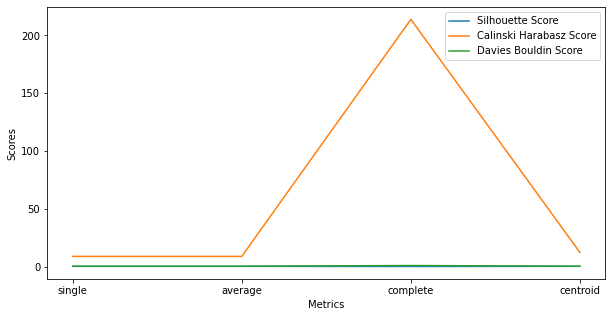

In [74]:
metric=["single","average","complete","centroid"]
SS = []
CHS=[]
DBS=[]
for m in metric:
    Z = linkage(pca_data, m)
    labels=fcluster(Z, t=2,criterion='maxclust')
    SS.append(silhouette_score(pca_data, labels))
    CHS.append(calinski_harabasz_score(pca_data, labels))
    DBS.append(davies_bouldin_score(pca_data, labels))
plt.figure(figsize=(10,5))    
plt.plot(metric, SS ,label = "Silhouette Score")
plt.plot(metric, CHS ,label = "Calinski Harabasz Score")
plt.plot(metric, DBS ,label = "Davies Bouldin Score")
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.legend()
plt.show()

In [75]:
print("Silhouette Scores: ",SS)
print("Calinski Harabasz Score: ",CHS)
print("Davies Bouldin Scores: ",DBS)

Silhouette Scores:  [0.4462939082989735, 0.4462939082989735, 0.3615471790659384, 0.4757715637427472]
Calinski Harabasz Score:  [9.044775402886122, 9.044775402886122, 213.848485894098, 12.43477097131822]
Davies Bouldin Scores:  [0.5826631855476194, 0.5826631855476194, 1.1522721990037916, 0.577333950707027]


In [119]:
def shuffle(df, n=1, axis=0):
    df=df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle,axis=axis)
    return df

In [130]:
SS = []
CHS=[]
DBS=[]
for i in range(5):
    y=pdist(df)
    Z = linkage(pca_data, "complete")
    labels=fcluster(Z, t=2,criterion='maxclust')
    SS.append(silhouette_sconumpyre(pca_data, labels))
    CHS.append(calinski_harabasz_score(pca_data, labels))
    DBS.append(davies_bouldin_score(pca_data, labels))
print("Silhouette Scores: ",SS)
print("Calinski Harabasz Score: ",CHS)
print("Davies Bouldin Scores: ",DBS)

Silhouette Scores:  [0.3615471790659384, 0.3615471790659384, 0.3615471790659384, 0.3615471790659384, 0.3615471790659384]
Calinski Harabasz Score:  [213.848485894098, 213.848485894098, 213.848485894098, 213.848485894098, 213.848485894098]
Davies Bouldin Scores:  [1.1522721990037916, 1.1522721990037916, 1.1522721990037916, 1.1522721990037916, 1.1522721990037916]


In [94]:
y=pdist(pca_data)
Z = linkage(pca_data, "complete")
labels=fcluster(Z, t=2,criterion='maxclust')
SS=silhouette_score(pca_data, labels)
CHS=calinski_harabasz_score(pca_data, labels)
DBS=davies_bouldin_score(pca_data, labels)

In [95]:
print(SS)
print(CHS)
print(DBS)

0.3615471790659384
213.848485894098
1.1522721990037916


In [36]:
Z = linkage(data, 'single')
labels=fcluster(Z, t=2,criterion='maxclust')
print(silhouette_score(pca_data, labels))
print(calinski_harabasz_score(pca_data, labels))
print(davies_bouldin_score(pca_data, labels))

0.44561165570405564
8.974455146766747
0.5977032818092752


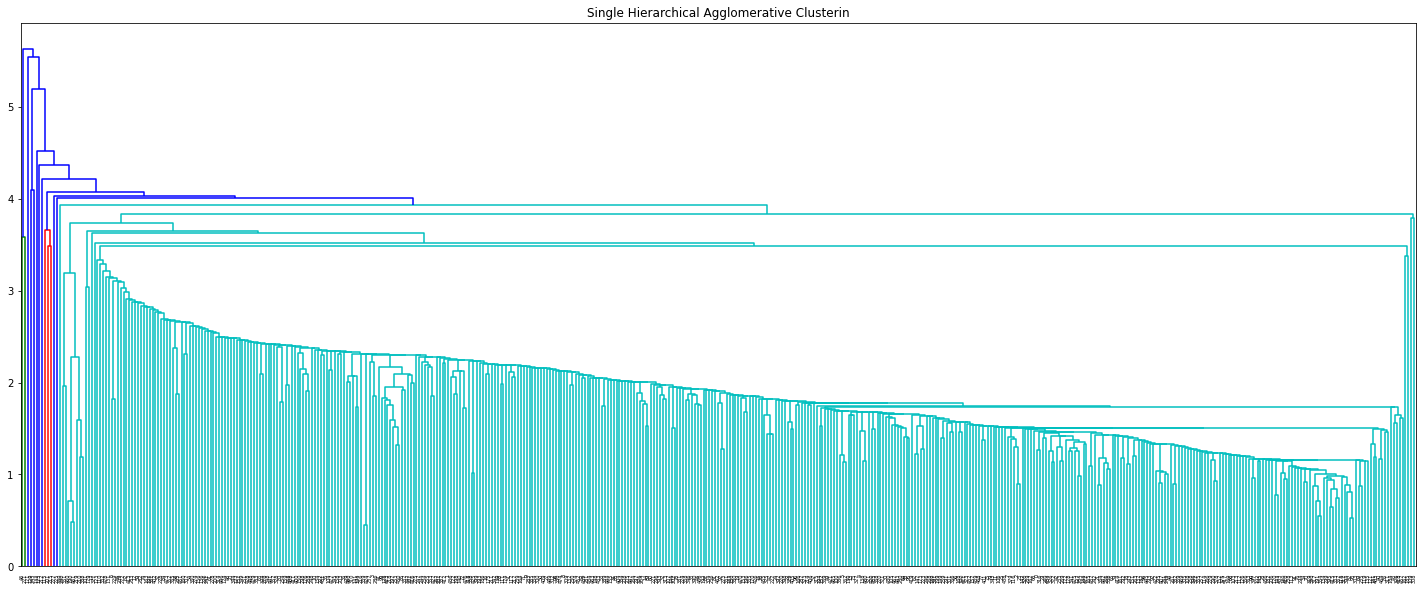

In [20]:
Z = linkage(pca_data, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title("Single Hierarchical Agglomerative Clusterin")
plt.savefig("SingleAgglomerative.png")

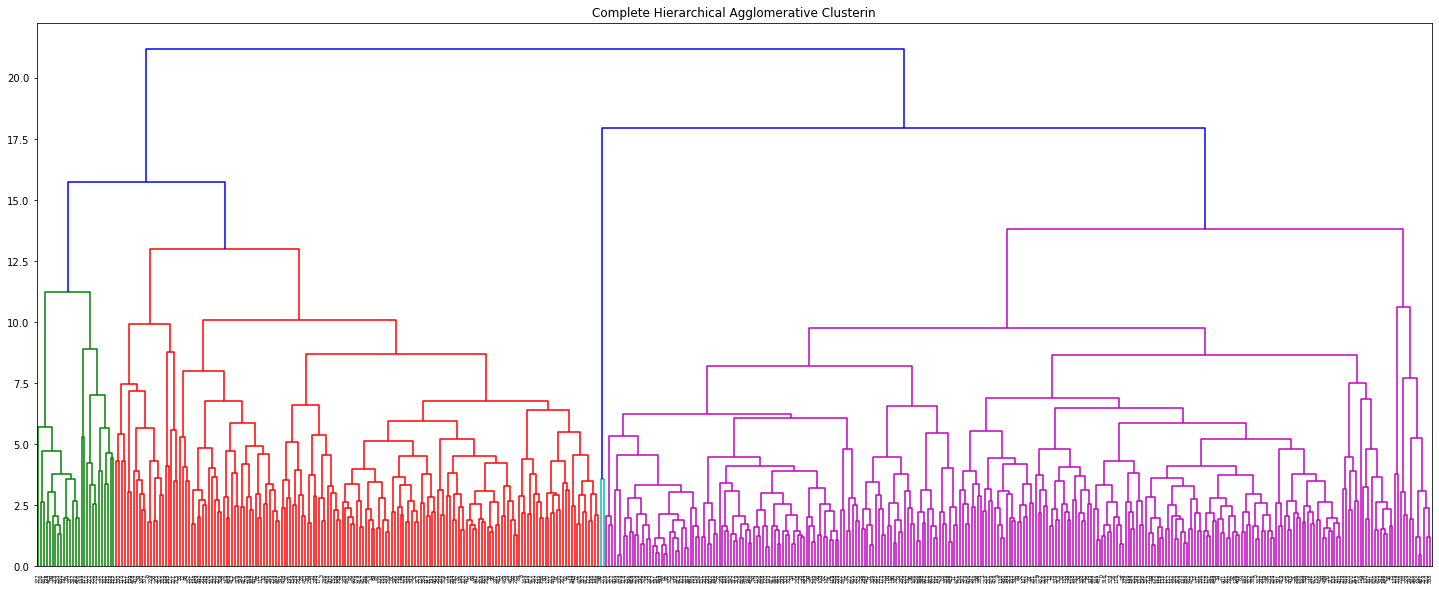

In [22]:
Z = linkage(pca_data, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title("Complete Hierarchical Agglomerative Clusterin")
plt.savefig("CompleteAgglomerative.png")

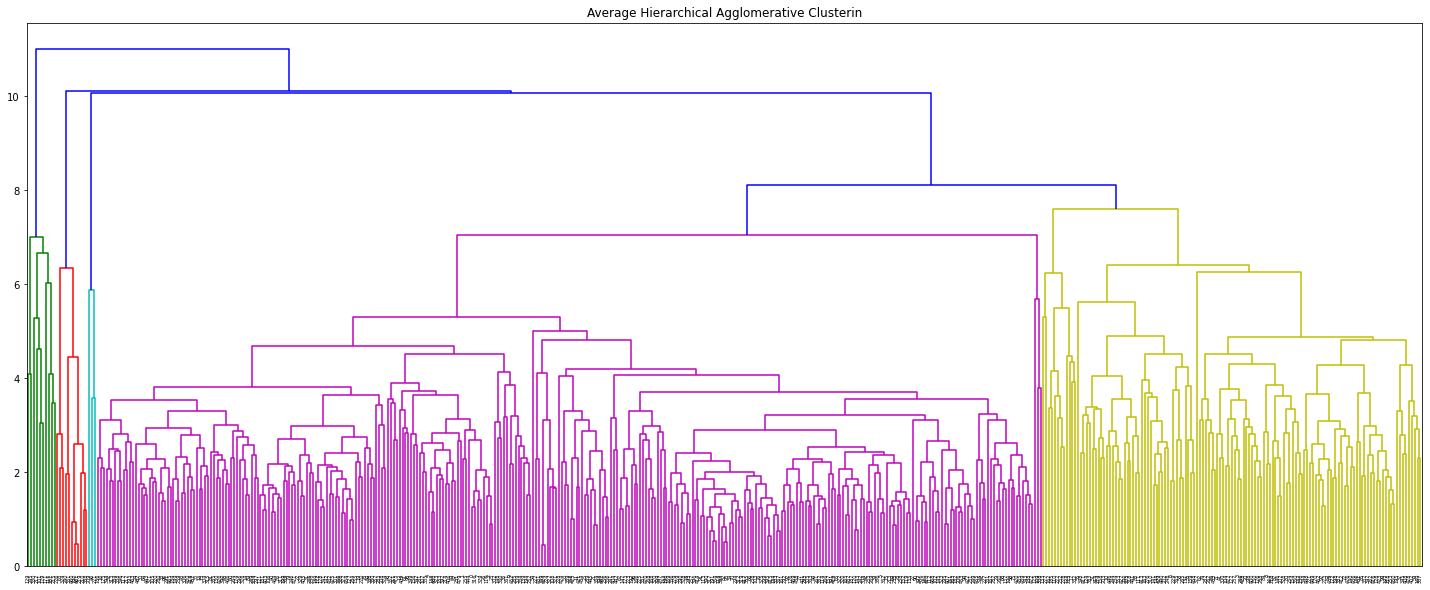

In [23]:
Z = linkage(pca_data, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title("Average Hierarchical Agglomerative Clusterin")
plt.savefig("AverageAgglomerative.png")

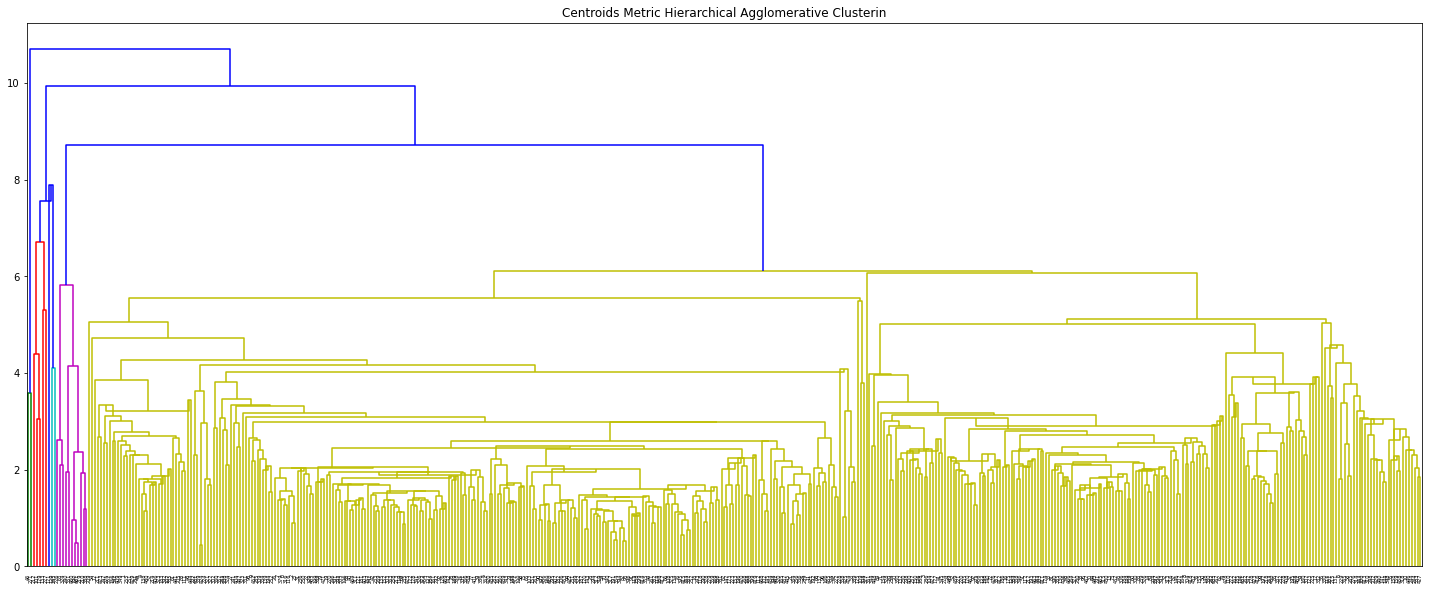

In [24]:
Z = linkage(pca_data, 'centroid')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title("Centroids Metric Hierarchical Agglomerative Clusterin")
plt.savefig("CentroidAgglomerative.png")

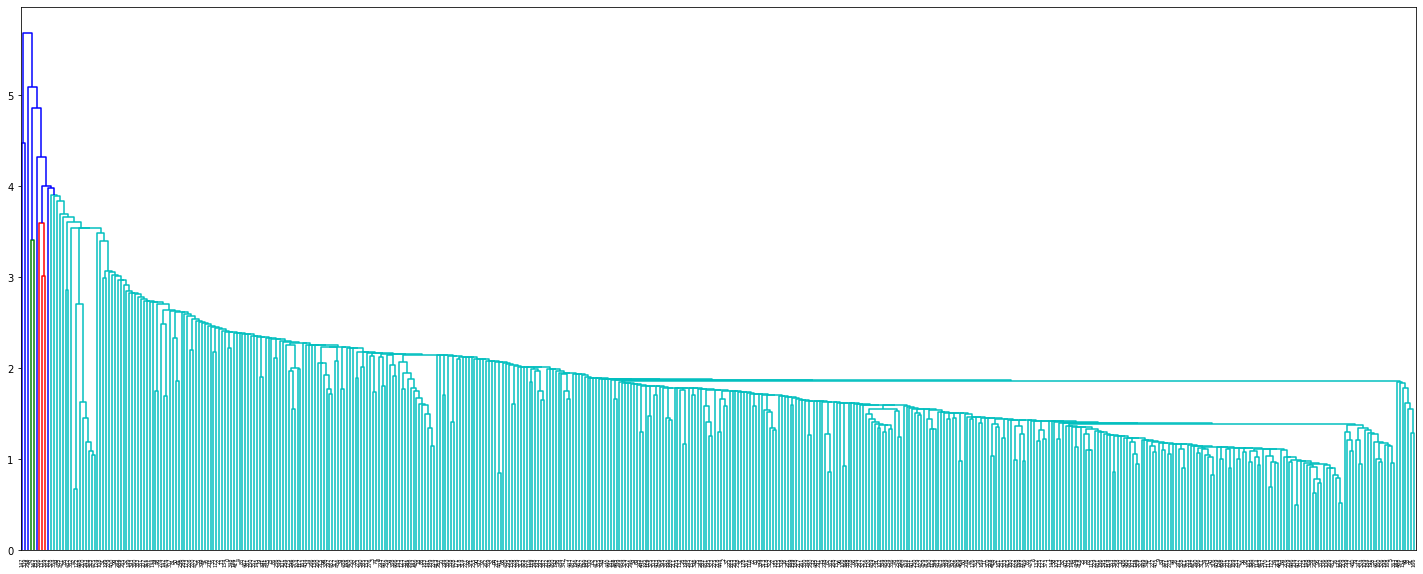

In [23]:
data=np.random.shuffle(pca_data)
ZS = linkage(pca_data, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(ZS)

In [57]:
data=[[2,2,5,4,7,8],
      [20,10,15,25,35,45]]

In [58]:
data_scld = np.zeros((2,6))
for row in range(0,2):
    x=[]
    mean=np.divide(np.sum(data[row]),len(data[row]))
    x.append([((x - mean)**2) for x in data[row]]) 
    std=np.sqrt( np.sum(x) / len(x) )
    for col in range(0,6):
        data_scld[row][col]=(data[row][col] - mean) / std
data_scld=data_scld.T

In [59]:
data_scld

array([[-0.47639307, -0.17149859],
       [-0.47639307, -0.51449576],
       [ 0.05954913, -0.34299717],
       [-0.11909827,  0.        ],
       [ 0.41684393,  0.34299717],
       [ 0.59549133,  0.68599434]])

In [164]:
def calculatedist(elt1,elt2,choice="euclidean"):
    return np.sqrt( ((elt1[0]-elt2[0])**2) + ((elt1[1]-elt2[1])**2) )
        

In [165]:
numerical_dist=np.zeros((6,6))
for row in range(0,6):
    for col in range(0,6):
        numerical_dist[row][col]=calculatedist( data_scld[row], data_scld[col] )

In [167]:
print(numsim)

[[ 1.          0.65700283  0.4372871   0.60367773 -0.03081435 -0.37267268]
 [ 0.65700283  1.          0.4372871   0.37360918 -0.23821099 -0.60938269]
 [ 0.4372871   0.4372871   1.          0.6132676   0.22653519 -0.16019721]
 [ 0.60367773  0.37360918  0.6132676   1.          0.36369732  0.00943121]
 [-0.03081435 -0.23821099  0.22653519  0.36369732  1.          0.6132676 ]
 [-0.37267268 -0.60938269 -0.16019721  0.00943121  0.6132676   1.        ]]


In [166]:
numsim=1-numerical_dist

In [145]:
numstd=np.std(numsim.flatten())

In [146]:
np.std(numsim)

0.4653587148844694

In [158]:
def calculatedist1(numsim,numstd, catsim,catstd, lamda=0.5):
    return (lamda*(numsim/numstd) + (1-lamda)*(catsim/catstd))
        

In [66]:
G=nx.Graph()

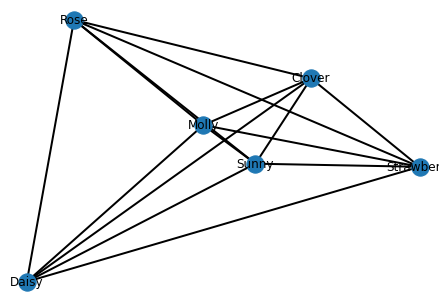

In [67]:
corr_data =([['Clover', 'Clover', 0],
       ['Clover', 'Sunny', 0.28571429],
       ['Clover', 'Rose', 0.52000785],
       ['Clover', 'Daisy', 0.36265586],
       ['Clover', 'Strawberry', 0.93707946],
       ['Clover', 'Molly', 1.22890361],
       ['Sunny', 'Clover', 0.28571429],
       ['Sunny', 'Sunny', 0.],
       ['Sunny', 'Rose', 0.52000785],
       ['Sunny', 'Daisy', 0,54294068],
       ['Sunny', 'Strawberry', 1.09756482],
       ['Sunny', 'Molly', 1.41421356],
       ['Rose', 'Clover', 0.52000785],
       ['Rose', 'Sunny', 0.52000785],
       ['Rose', 'Rose', 0.0],
       ['Rose', 'Daisy', 0.33077248],
       ['Rose', 'Strawberry', 0.66154495],
       ['Rose', 'Molly', 0.99231743],
       ['Daisy', 'Clover', 0.36265586],
       ['Daisy', 'Sunny', 0.54294068],
       ['Daisy', 'Rose', 0.33077248],
       ['Daisy', 'Daisy', 0.0],
       ['Daisy', 'Strawberry', 0.57587555],
       ['Daisy', 'Molly', 0.87805185],
       ['Strawberry', 'Clover', 0.93707946],
       ['Strawberry', 'Sunny', 1.09756482],
       ['Strawberry', 'Rose', 0.66154495],
       ['Strawberry', 'Daisy', 0.57587555],
       ['Strawberry', 'Strawberry', 0.0],
       ['Strawberry', 'Molly', 0.33077248],
       ['Molly', 'Clover', 1.22890361],
       ['Molly', 'Sunny', 1.41421356],
       ['Molly', 'Rose', 0.99231743],
       ['Molly', 'Daisy', 0.87805185],
       ['Molly', 'Strawberry', 0.33077248],
       ['Molly', 'Molly', 0.0]
            ])

corr_data = [[x[0],x[1],1000**(x[2])] for x in corr_data]

existing_edges = {}

def build_graph(w, lev):
    if (lev > 5)  :
        return
    for z in corr_data:
        ind=-1 
        if z[0] == w:
            ind=0
            ind1=1
        if z[1] == w:
            ind ==1
            ind1 =0
        if ind == 0 or ind == 1:
            if  str(w) + "_" + str(corr_data[ind1]) not in existing_edges :
                G.add_node(str(corr_data[ind]))
                existing_edges[str(w) + "_" + str(corr_data[ind1])] = 1;
                G.add_edge(w,str(corr_data[ind1]))
            build_graph(corr_data[ind1], lev+1)


existing_nodes = {}
def build_graph_for_all():
    count=0
    for d in corr_data:
        if (count > 40) :
            return
        if  d[0] not in existing_edges :
             G.add_node(str(d[0]))
        if  d[1] not in existing_edges :     
             G.add_node(str(d[1]))
        G.add_weighted_edges_from([[str(d[0]), str(d[1]),d[2]]])     
        count=count + 1


build_graph_for_all()

pos = nx.spring_layout(G,weight='weight')
nx.draw(G,pos=pos, width=2, with_labels=True)

plt.savefig("path1.png")

In [88]:
data_scld=data_scld.T

In [89]:
data_scld

array([[-1.16691993, -0.42008403],
       [-1.16691993, -1.26025208],
       [ 0.14586499, -0.84016805],
       [-0.29172998,  0.        ],
       [ 1.02105494,  0.84016805],
       [ 1.45864991,  1.6803361 ]])

In [97]:
x=data_scld[0,0:]
y=data_scld[1,0:]
xy=data_scld[0:2,0:]
right=(y-x).T
c=np.cov(xy)
inv_c=np.linalg.inv(c)
left=(y-x)
lftdot=left.dot(inv_c)
res=lftdot.dot(right)
np.sqrt(res)

<ipython-input-97-d52e965a5c09>:10: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(res)


nan

array([-1.16691993, -0.42008403])

In [92]:
y

array([-1.16691993, -1.26025208])

In [93]:
xy

array([[-1.16691993, -0.42008403],
       [-1.16691993, -1.26025208]])